# Kernels

In [1]:
import gpflow as gpf
import matplotlib.pyplot as plt
import numpy as np

from tsipy.utils.plot import set_style

In [2]:
np.random.seed(0)
set_style()

def plot_kernel(kernel_, ax_, x_min=-3, x_max=3, n_samples=5, length=1000, name_=None):
    xx = np.linspace(x_min, x_max, length)[:, None]
    K = kernel_(xx)
    ax_.plot(xx, np.random.multivariate_normal(np.zeros(length), K, n_samples).T)

    if not name_:
        name_ = kernel_.__class__.__name__
    ax_.set_title(name_)

## Standard Kernels

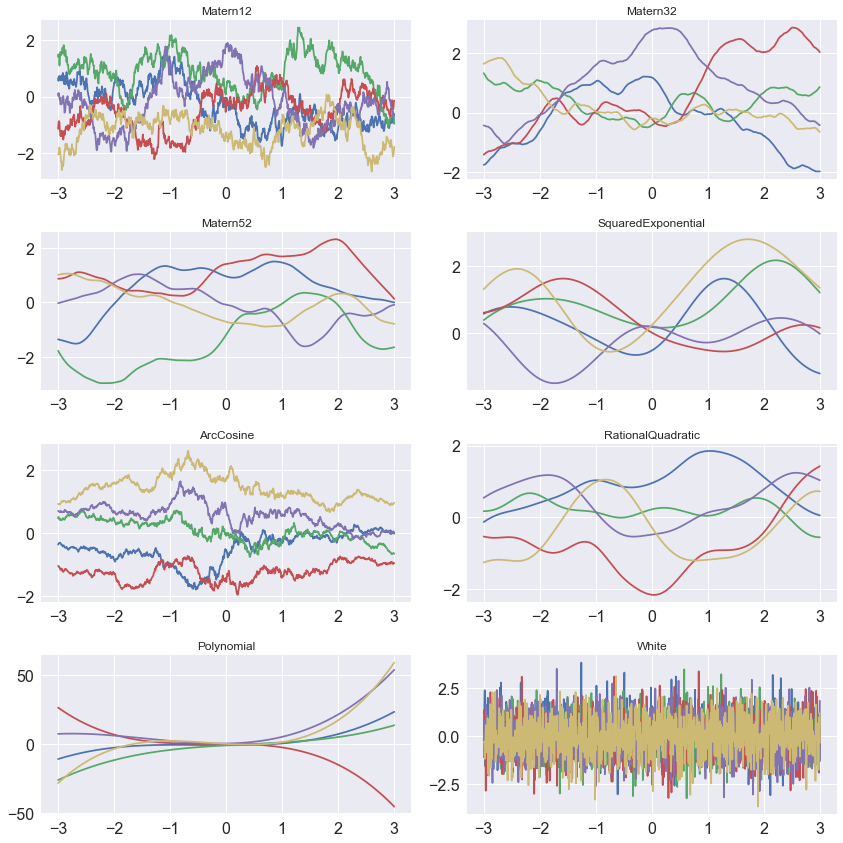

In [7]:
kernels = [
    gpf.kernels.Matern12(),
    gpf.kernels.Matern32(),
    gpf.kernels.Matern52(),
    gpf.kernels.SquaredExponential(),
    gpf.kernels.ArcCosine(),
    gpf.kernels.RationalQuadratic(),
    gpf.kernels.Polynomial(),
    gpf.kernels.White(),
]

fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.flatten()
for ax, kernel in zip(axes, kernels):
    plot_kernel(kernel, ax)
fig.tight_layout()

## Kernel Design

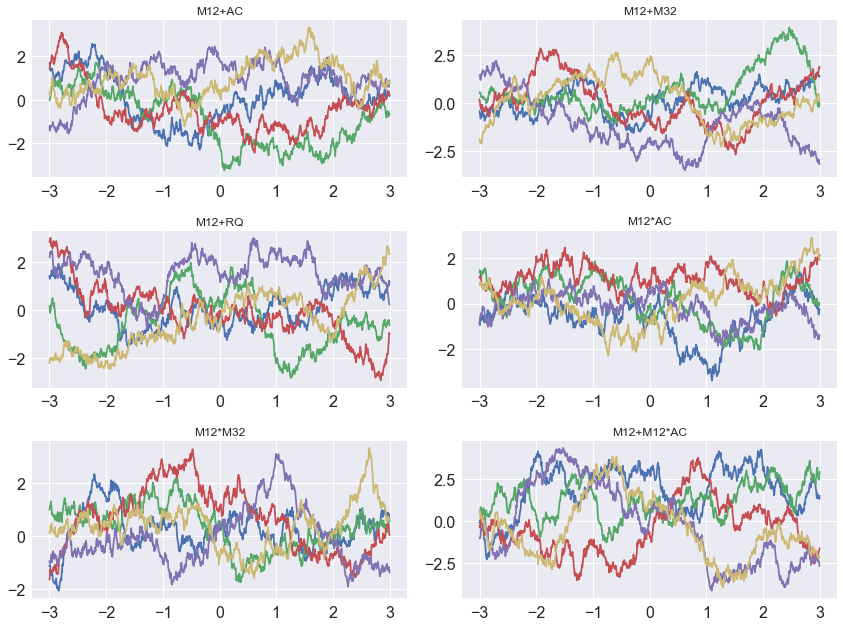

In [8]:
kernel_combinations = [
    (gpf.kernels.Matern12() + gpf.kernels.ArcCosine(), "M12+AC"),
    (gpf.kernels.Matern12() + gpf.kernels.Matern32(), "M12+M32"),
    (gpf.kernels.Matern12() + gpf.kernels.RationalQuadratic(), "M12+RQ"),
    (gpf.kernels.Matern12() * gpf.kernels.ArcCosine(), "M12*AC"),
    (gpf.kernels.Matern12() * gpf.kernels.Matern32(), "M12*M32"),
    (
        gpf.kernels.Matern12() + gpf.kernels.Matern12() + gpf.kernels.ArcCosine(),
        "M12+M12*AC",
    ),
]

fig, axes = plt.subplots(3, 2, figsize=(12, 9))
axes = axes.flatten()
for ax, (kernel, name) in zip(axes, kernel_combinations):
    plot_kernel(kernel, ax, name_=name)
fig.tight_layout()